В данном задании я реализовал алгоритм визуализации **деревьев** Layered-Tree-Draw, на вход подается ориентированный граф. Если у вершины только один потомок, то расположим его под ним. Алгоритм расширен не только для бинарны деревьев, но и для деревьев, у которых больше двух детей.

In [3]:
 pip install networkx

In [24]:
import networkx as nx
from networkx.readwrite.graphml import read_graphml

In [25]:
example = read_graphml('tree.xml')

In [26]:
nodes = [int(i[1:]) for i in list(example.nodes)]
edges={}
for node in list(example.nodes):
  edges[int(node[1:])]=[int(i[1:]) for i in example.neighbors(node)]

In [27]:
print(edges)

{0: [1, 52], 1: [2, 4, 8, 13, 15, 20], 2: [3, 7, 16, 34], 3: [5, 45], 4: [], 5: [6, 10, 21, 39], 6: [9, 14], 7: [12, 27], 8: [11, 17, 19], 9: [36, 50, 53], 10: [40], 11: [54], 12: [18, 29], 13: [], 14: [], 15: [49], 16: [], 17: [48], 18: [32, 37], 19: [30, 44, 56], 20: [31], 21: [22, 23, 24], 22: [25, 35], 23: [41], 24: [], 25: [26, 42], 26: [], 27: [28, 57], 28: [], 29: [33], 30: [47], 31: [43], 32: [], 33: [], 34: [], 35: [38], 36: [], 37: [], 38: [], 39: [], 40: [46], 41: [], 42: [], 43: [51], 44: [], 45: [], 46: [], 47: [], 48: [], 49: [], 50: [], 51: [], 52: [], 53: [], 54: [55], 55: [], 56: [], 57: []}


In [28]:
index = 0
x_coord={}
y_coord={}

Layered-Tree-Draw:

In [29]:
import networkx as nx
import statistics
from networkx.readwrite.graphml import read_graphml
import copy
import matplotlib.pyplot as plt
import numpy as np

def get_contur(v, d):
    if(contours.get(v)!=None):
        return
    if (not edges[v]):
        x_coord[v] = 0
        y_coord[v] = d
        contours[v]= [[v],[v]]
    else:
        new_coord = []
        if (len(edges[v])==1):
            get_contur(edges[v][0], d - 1)
            left_common = contours[edges[v][0]][0]
            right_common=contours[edges[v][0]][1]
        for i in range(len(edges[v]) - 1):
            get_contur(edges[v][i], d - 1)
            get_contur(edges[v][i+1], d - 1)
            if(i == 0):
                right_common = contours[edges[v][0]][1]
                left_common = contours[edges[v][0]][0]
            right = copy.copy(right_common)
            left = contours[edges[v][i+1]][0]

            c = get_diff(right[::-1], left[::-1])
            update_coords(edges[v][i+1], c)
            new_coord.append(x_coord[edges[v][i]])
            right_common = merge(contours[edges[v][i+1]][1][::-1], right_common[::-1])[::-1]
            left_common = merge(left_common[::-1], contours[edges[v][i+1]][0][::-1])[::-1]
        new_coord.append(x_coord[edges[v][-1]])
        x_coord[v] = statistics.median(new_coord)
        y_coord[v] = d
        left_ = copy.copy(left_common)
        right_ = copy.copy(right_common)
        left_.append(v)
        right_.append(v)

        contours[v] = [left_, right_]
def get_diff(left, right):
    c = 0
    for l, r in zip(left, right):
        diff = x_coord[l] - x_coord[r] + 1
        c = max(diff, c)
    return c

def update_coords(v, c):
    x_coord[v] = x_coord[v] + c

    for edge in edges[v]:
        update_coords(edge, c)


def merge(arr1, arr2):
    arr = copy.copy(arr1)
    for i in range(len(arr1), len(arr2)):
        arr.append(arr2[i])
    return arr
    

In [30]:
x_coord={}
y_coord={}
contours={}

get_contur(0, 0)

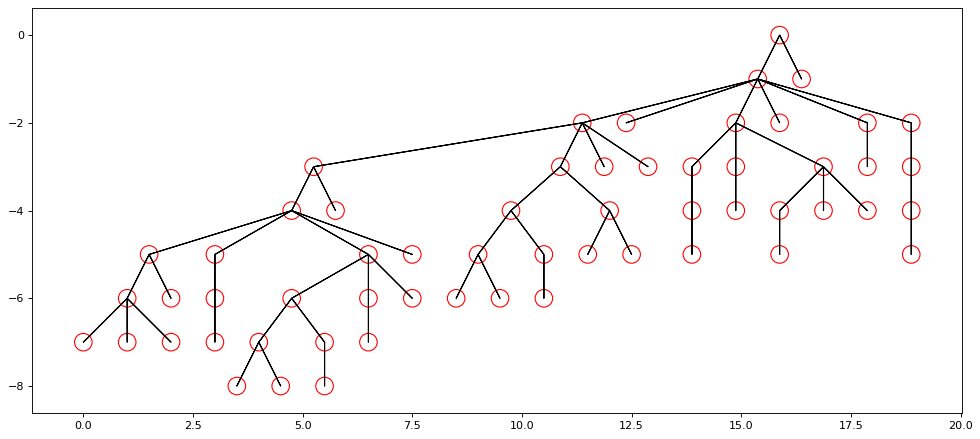

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure


figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')

ax=plt.gca()
for x,y in zip(x_coord, y_coord):
  circle = plt.Circle((x_coord[x], y_coord[y]), 0.2, color='r', fill=False)
  ax.add_patch(circle)

for edge in edges:
  if (edges[edge]):
    for ex in edges[edge]:
      ax.arrow(x_coord[edge],y_coord[edge],-x_coord[edge]+x_coord[ex],-y_coord[edge]+y_coord[ex])
plt.axis('scaled')
plt.show()